In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
df=pd.read_csv('Train.csv')

In [18]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [20]:
for col in df.columns:
    if df[col].dtype=='object':
        print(f"{col} has {df[col].unique()} unique value")
    else:
        print(f"{col} has {df[col].nunique()} unique value")

ID has 10999 unique value
Warehouse_block has ['D' 'F' 'A' 'B' 'C'] unique value
Mode_of_Shipment has ['Flight' 'Ship' 'Road'] unique value
Customer_care_calls has 6 unique value
Customer_rating has 5 unique value
Cost_of_the_Product has 215 unique value
Prior_purchases has 8 unique value
Product_importance has ['low' 'medium' 'high'] unique value
Gender has ['F' 'M'] unique value
Discount_offered has 65 unique value
Weight_in_gms has 4034 unique value
Reached.on.Time_Y.N has 2 unique value


In [21]:
df.duplicated().sum()

0

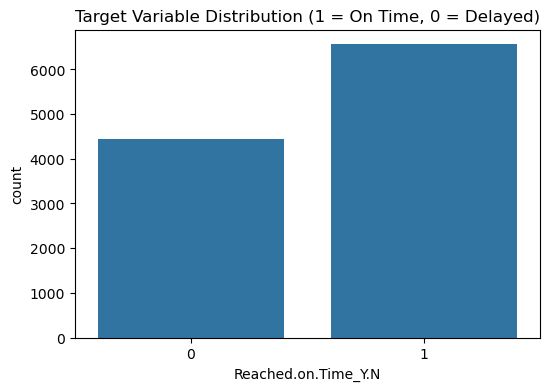

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x="Reached.on.Time_Y.N", data=df)
plt.title("Target Variable Distribution (1 = On Time, 0 = Delayed)")
plt.show()

In [24]:
df['Reached.on.Time_Y.N'].value_counts(normalize=True)*100

Reached.on.Time_Y.N
1    59.669061
0    40.330939
Name: proportion, dtype: float64

In [26]:
# Number of plots per row
plots_per_row = 3

# Total number of columns
total_cols = df.shape[1]

# Rows needed
n_rows = (total_cols + plots_per_row - 1) // plots_per_row

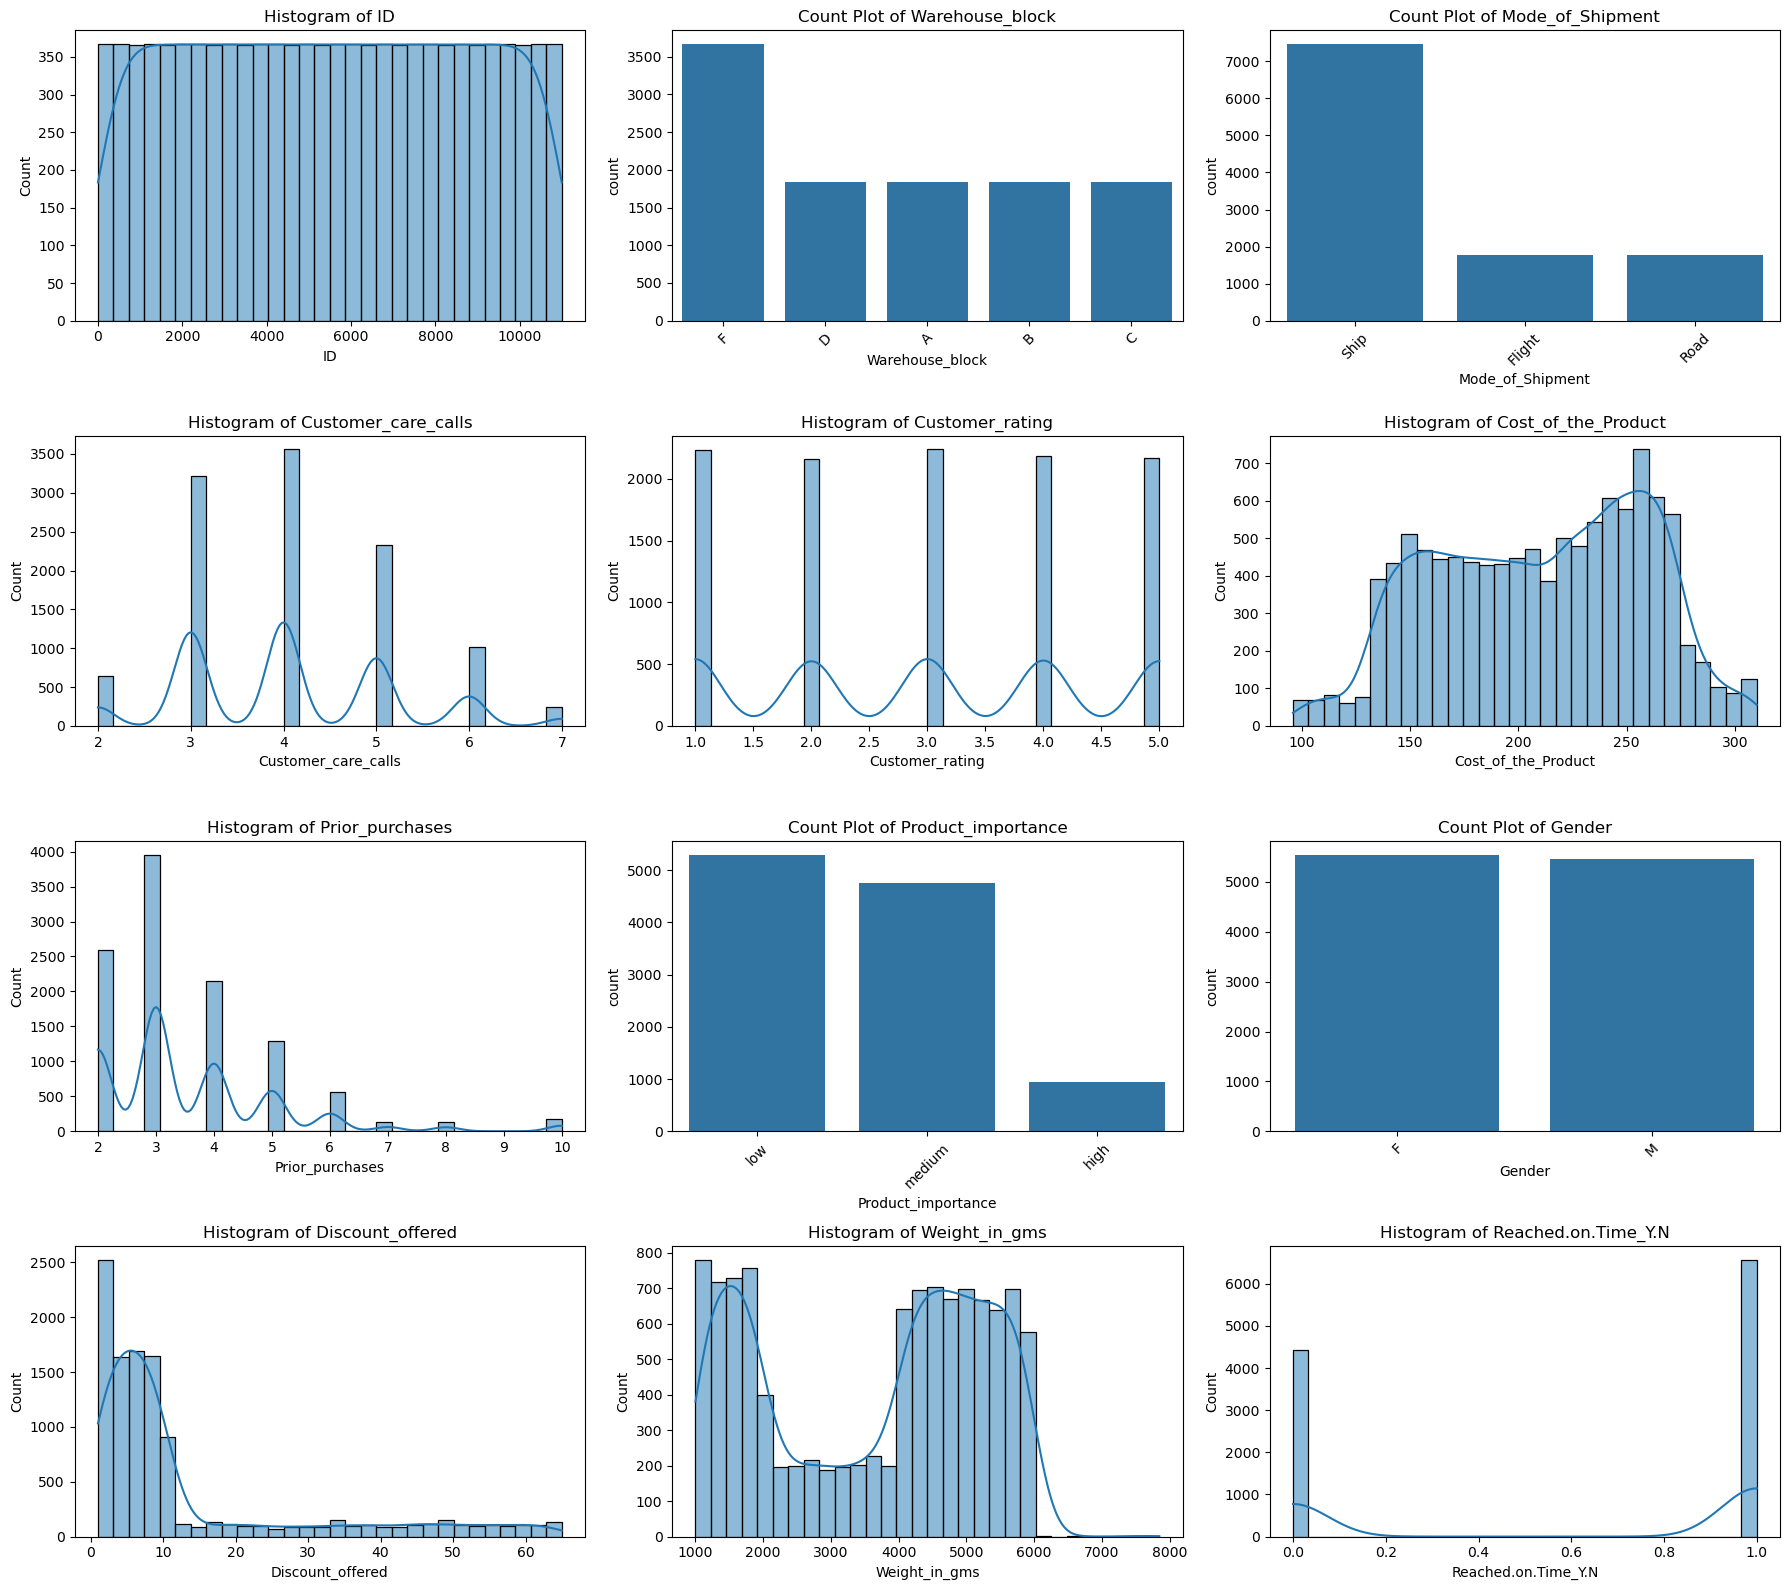

In [27]:
plt.figure(figsize=(plots_per_row * 6, n_rows * 4))

for i, col in enumerate(df.columns, 1):
    plt.subplot(n_rows, plots_per_row, i)

    if df[col].dtype == 'object':  # categorical
        sns.countplot(x=col, data=df, order=df[col].value_counts().index)
        plt.title(f"Count Plot of {col}")
        plt.xticks(rotation=45)
    else:  # numerical
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

In [28]:
# Target column
target_col = 'Reached.on.Time_Y.N'

# Features = all except target
features = [col for col in df.columns if col != target_col]

# Features to plot with stripplot
stripplot_features = ['Customer_care_calls', 'Customer_rating', 
                      'Cost_of_the_Product', 'Prior_purchases']

# Layout setup
plots_per_row = 3
total_cols = len(features)
n_rows = (total_cols + plots_per_row - 1) // plots_per_row

/var/folders/1t/97pw92md1yqcbjcsflvw33f00000gn/T/ipykernel_7242/4185565264.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette="Set3")
/var/folders/1t/97pw92md1yqcbjcsflvw33f00000gn/T/ipykernel_7242/4185565264.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x=target_col, y=col, jitter=0.2, size=3, palette="Set2")
/var/folders/1t/97pw92md1yqcbjcsflvw33f00000gn/T/ipykernel_7242/4185565264.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x=target_col, y=col, jitter=0.2, size=

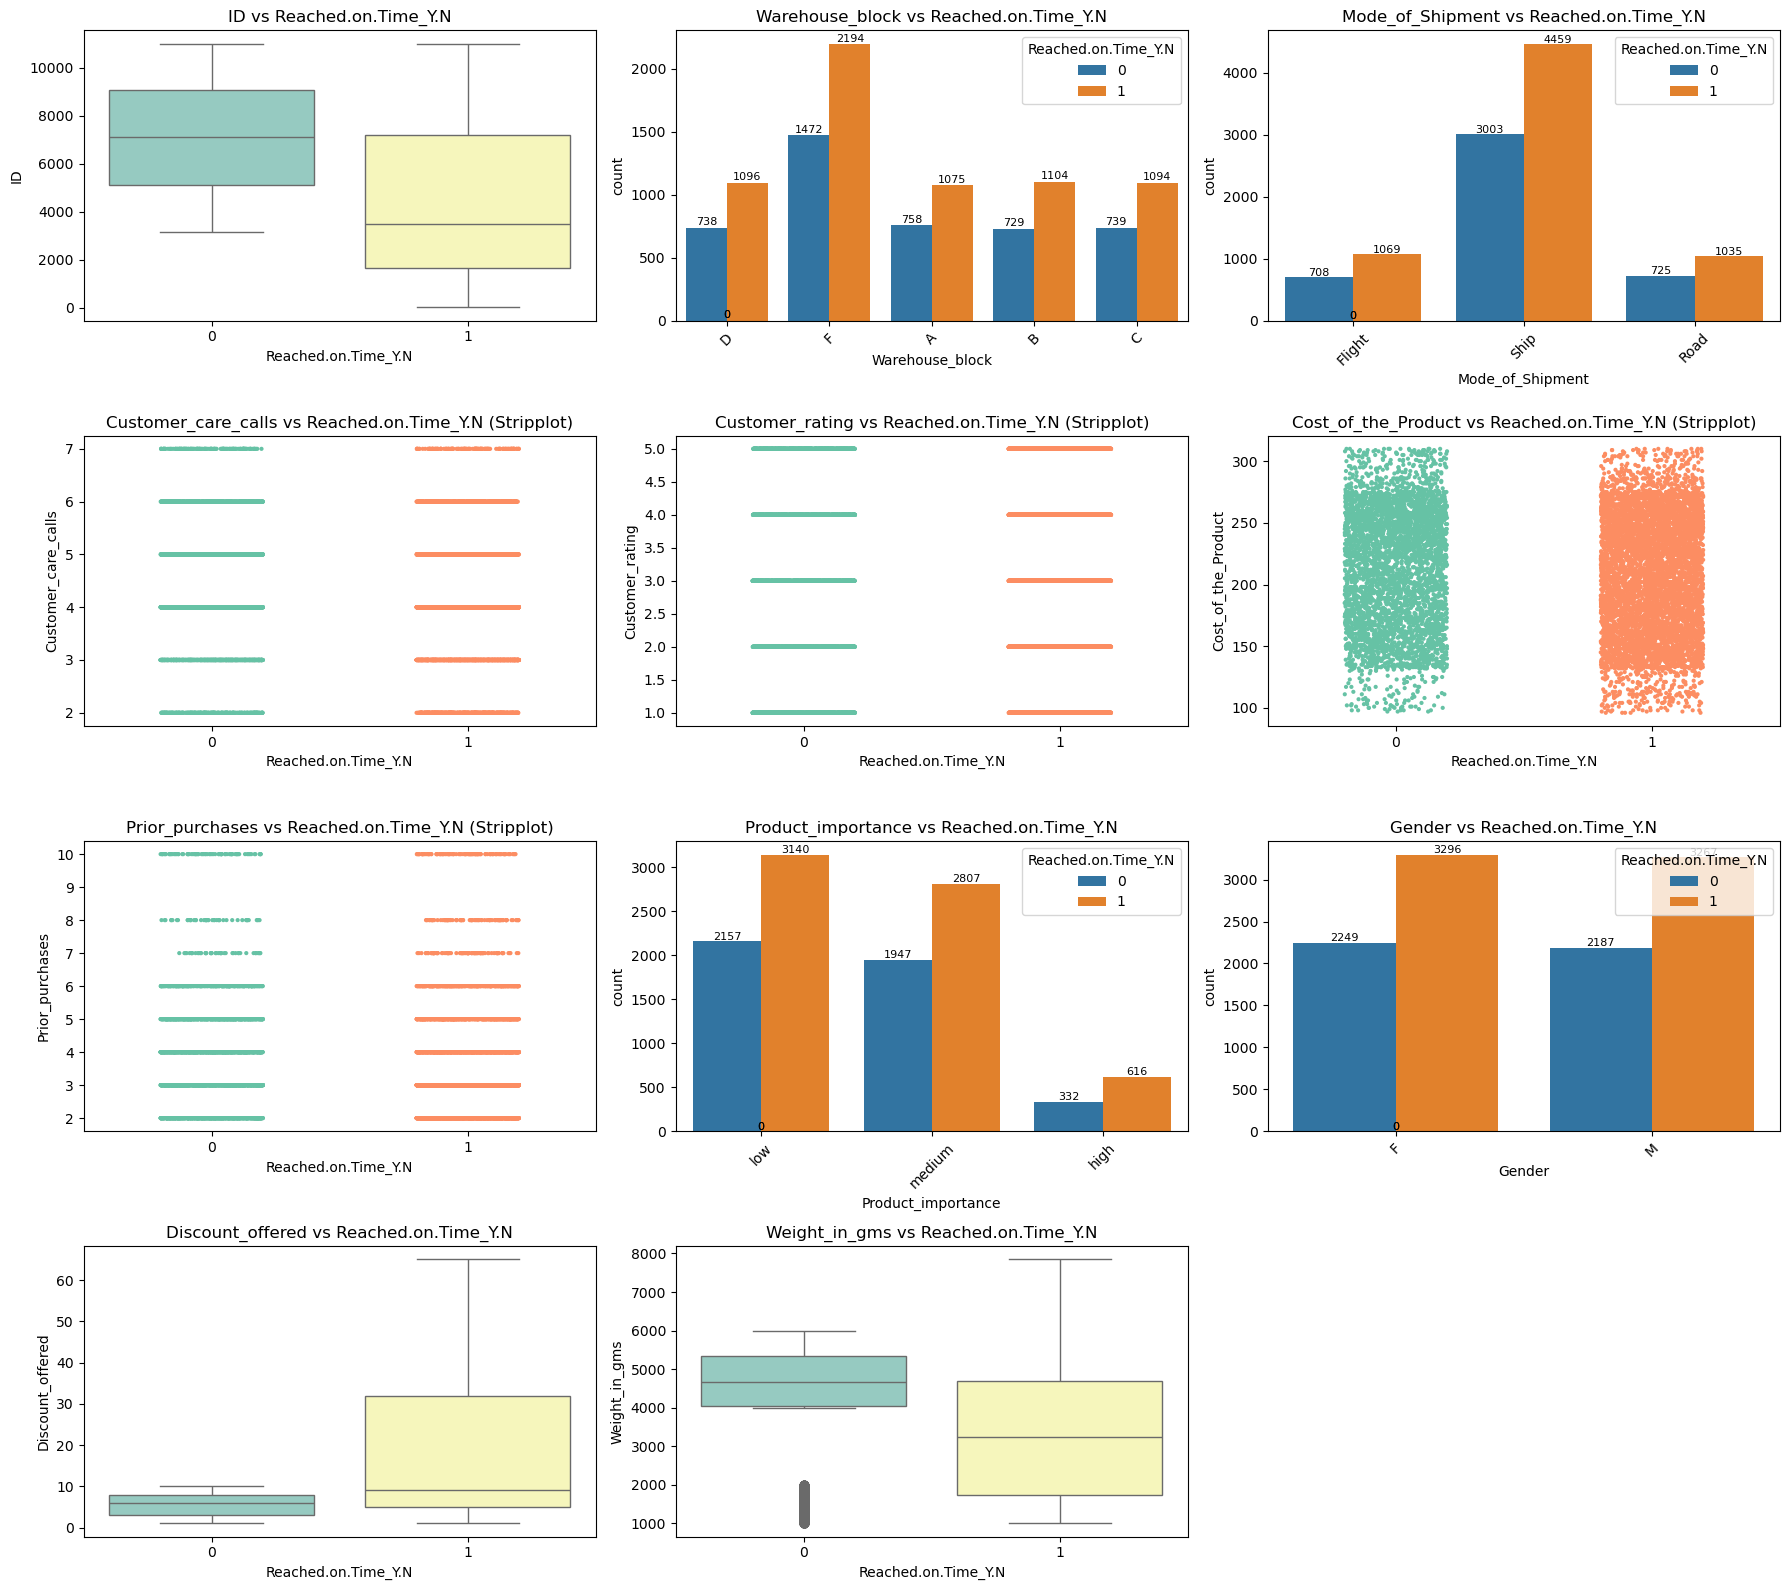

In [29]:
plt.figure(figsize=(plots_per_row * 6, n_rows * 4))

for i, col in enumerate(features, 1):
    plt.subplot(n_rows, plots_per_row, i)

    # Categorical features
    if df[col].dtype == 'object':
        ax = sns.countplot(x=col, hue=target_col, data=df)
        plt.xticks(rotation=45)
        plt.title(f"{col} vs {target_col}")

        # Add counts
        for p in ax.patches:
            ax.text(p.get_x() + p.get_width() / 2,
                    p.get_height() + 20,
                    int(p.get_height()),
                    ha="center", fontsize=8)

    # Numeric features with stripplot
    elif col in stripplot_features:
        sns.stripplot(data=df, x=target_col, y=col, jitter=0.2, size=3, palette="Set2")
        plt.title(f"{col} vs {target_col} (Stripplot)")

    # Other numeric features → boxplot
    else:
        sns.boxplot(x=target_col, y=col, data=df, palette="Set3")
        plt.title(f"{col} vs {target_col}")

plt.tight_layout()
plt.show()

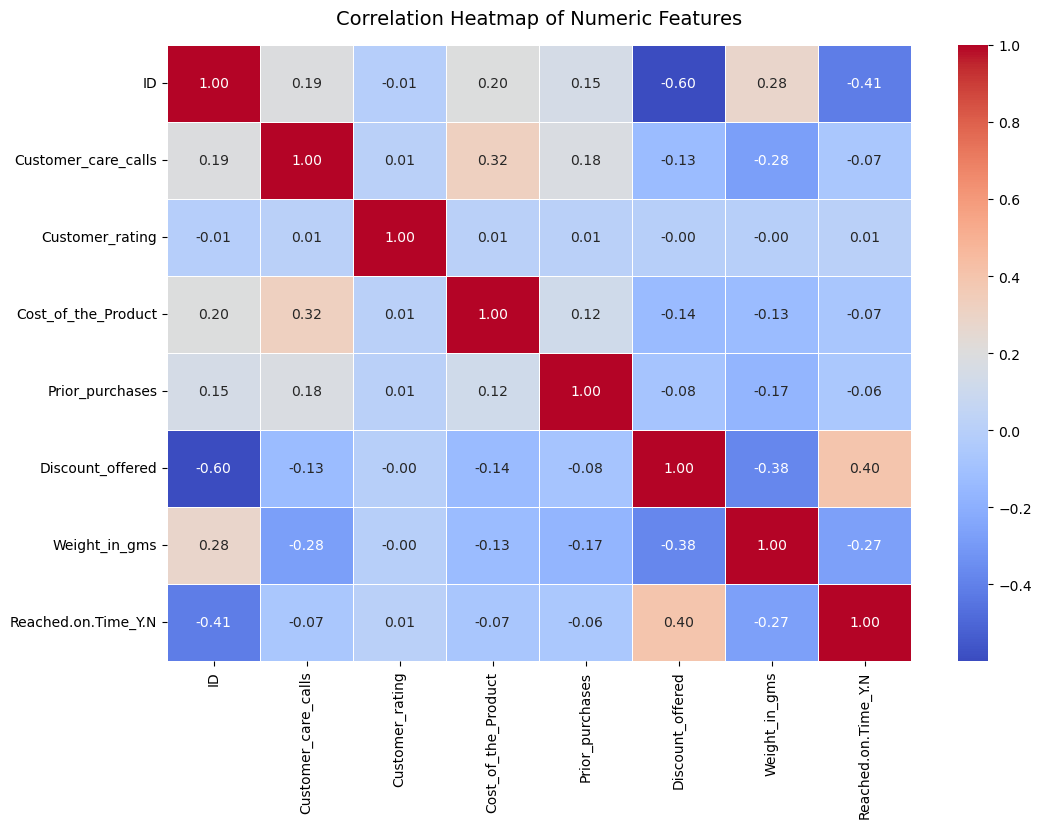

In [32]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14, pad=15)
plt.show()

In [ ]:
# Handling outliers (using IQR rule for numerical features)
print(f"Number of rows before outlier removal: {len(df)}")
outlier_cols = [
    'Customer_care_calls', 'Customer_rating', 
    'Prior_purchases','Cost_of_the_Product', 
    'Discount_offered', 'Weight_in_gms'
]
for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    print(f"After removing outliers in {col}: {len(df)} rows left")

print(f"Number of rows after outlier removal: {len(df)}")

Number of rows before outlier removal: 10999
After removing outliers in Customer_care_calls: 10999 rows left
After removing outliers in Customer_rating: 10999 rows left
After removing outliers in Prior_purchases: 9996 rows left
After removing outliers in Cost_of_the_Product: 9996 rows left
After removing outliers in Discount_offered: 7971 rows left
After removing outliers in Weight_in_gms: 7971 rows left
Number of rows after outlier removal: 7971


In [34]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [36]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_cols = ['Mode_of_Shipment', 'Product_importance']

category_orders = [
    ['Road', 'Ship', 'Flight'],  # Order for Mode_of_Shipment
    ['low', 'medium', 'high']    # Order for Product_importance
]

ordinal_encoder = OrdinalEncoder(categories=category_orders)
encoded_values = ordinal_encoder.fit_transform(df[ordinal_cols])

encoded_df = pd.DataFrame(
    encoded_values,
    columns=[col + '_encoded' for col in ordinal_cols],
    index=df.index
)
df = pd.concat([df, encoded_df], axis=1)

In [37]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Mode_of_Shipment_encoded,Product_importance_encoded
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,2.0,1.0
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1,2.0,1.0
6,7,D,Flight,3,4,250,3,low,F,3,2371,1,2.0,0.0
8,9,A,Flight,3,4,150,3,low,F,11,1861,1,2.0,0.0
10,11,C,Flight,3,4,189,2,medium,M,12,2888,1,2.0,1.0


In [38]:
# Interaction Features
df['Final_Price'] = df['Cost_of_the_Product'] * (1 - df['Discount_offered'] / 100)
df['discount_per_gram'] = df['Discount_offered'] / df['Weight_in_gms']
df['Customer_engagement']=df['Customer_care_calls']+df['Customer_rating']
df['Shipping_priority_score']=(df['Product_importance_encoded']) * (df['Mode_of_Shipment_encoded'])
df['Shipping_penalty_score']=df['Mode_of_Shipment_encoded']-df['Product_importance_encoded']

In [39]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Mode_of_Shipment_encoded,Product_importance_encoded,Final_Price,discount_per_gram,Customer_engagement,Shipping_priority_score,Shipping_penalty_score
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,2.0,1.0,158.40,0.008496,6,2.0,1.0
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1,2.0,1.0,142.56,0.008469,4,2.0,1.0
6,7,D,Flight,3,4,250,3,low,F,3,2371,1,2.0,0.0,242.50,0.001265,7,0.0,2.0
8,9,A,Flight,3,4,150,3,low,F,11,1861,1,2.0,0.0,133.50,0.005911,7,0.0,2.0
10,11,C,Flight,3,4,189,2,medium,M,12,2888,1,2.0,1.0,166.32,0.004155,7,2.0,1.0


In [41]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['Discount_offered', 'Weight_in_gms', 
                  'Final_Price', 'discount_per_gram', 'Customer_engagement']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numerical_cols])
scaled_df = pd.DataFrame(
    scaled_features,
    columns=[col + '_scaled' for col in numerical_cols],
    index=df.index
)
df = pd.concat([df, scaled_df], axis=1)

In [42]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,...,Final_Price,discount_per_gram,Customer_engagement,Shipping_priority_score,Shipping_penalty_score,Discount_offered_scaled,Weight_in_gms_scaled,Final_Price_scaled,discount_per_gram_scaled,Customer_engagement_scaled
3,4,B,Flight,3,3,176,4,medium,M,10,...,158.40,0.008496,6,2.0,1.0,1.131258,-1.716621,-0.920799,2.954990,-0.608268
5,6,F,Flight,3,1,162,3,medium,F,12,...,142.56,0.008469,4,2.0,1.0,1.695047,-1.568407,-1.263595,2.942237,-1.688112
6,7,D,Flight,3,4,250,3,low,F,3,...,242.50,0.001265,7,0.0,2.0,-0.842007,-0.979258,0.899223,-0.388416,-0.068345
8,9,A,Flight,3,4,150,3,low,F,11,...,133.50,0.005911,7,0.0,2.0,1.413152,-1.294212,-1.459664,1.759568,-0.068345
10,11,C,Flight,3,4,189,2,medium,M,12,...,166.32,0.004155,7,2.0,1.0,1.695047,-0.659981,-0.749401,0.947781,-0.068345


In [43]:
df.drop(columns=['ID','Warehouse_block','Mode_of_Shipment','Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Product_importance','Gender','Discount_offered','Weight_in_gms','Final_Price','Customer_care_calls','Customer_rating','Customer_engagement','Mode_of_Shipment_encoded','Product_importance_encoded'],inplace=True)

In [44]:
df.head()

,Reached.on.Time_Y.N,discount_per_gram,Shipping_priority_score,Shipping_penalty_score,Discount_offered_scaled,Weight_in_gms_scaled,Final_Price_scaled,discount_per_gram_scaled,Customer_engagement_scaled
3,1,0.008496,2.0,1.0,1.131258,-1.716621,-0.920799,2.954990,-0.608268
5,1,0.008469,2.0,1.0,1.695047,-1.568407,-1.263595,2.942237,-1.688112
6,1,0.001265,0.0,2.0,-0.842007,-0.979258,0.899223,-0.388416,-0.068345
8,1,0.005911,0.0,2.0,1.413152,-1.294212,-1.459664,1.759568,-0.068345
10,1,0.004155,2.0,1.0,1.695047,-0.659981,-0.749401,0.947781,-0.068345


In [46]:
# Polynomial Features (Degree 2)
from sklearn.preprocessing import PolynomialFeatures
poly_features = ['Weight_in_gms_scaled', 'Discount_offered_scaled']
poly = PolynomialFeatures(degree=2, include_bias=True)
poly_data = poly.fit_transform(df[poly_features])
poly_df = pd.DataFrame(
    poly_data,
    columns=poly.get_feature_names_out(poly_features),
    index=df.index
)
df.drop(columns=poly_features, inplace=True)
df = pd.concat([df, poly_df], axis=1)

In [47]:
df.head()

,Reached.on.Time_Y.N,discount_per_gram,Shipping_priority_score,Shipping_penalty_score,Final_Price_scaled,discount_per_gram_scaled,Customer_engagement_scaled,1,Weight_in_gms_scaled,Discount_offered_scaled,Weight_in_gms_scaled^2,Weight_in_gms_scaled Discount_offered_scaled,Discount_offered_scaled^2
3,1,0.008496,2.0,1.0,-0.920799,2.954990,-0.608268,1.0,-1.716621,1.131258,2.946786,-1.941940,1.279744
5,1,0.008469,2.0,1.0,-1.263595,2.942237,-1.688112,1.0,-1.568407,1.695047,2.459900,-2.658524,2.873186
6,1,0.001265,0.0,2.0,0.899223,-0.388416,-0.068345,1.0,-0.979258,-0.842007,0.958945,0.824541,0.708975
8,1,0.005911,0.0,2.0,-1.459664,1.759568,-0.068345,1.0,-1.294212,1.413152,1.674984,-1.828918,1.997000
10,1,0.004155,2.0,1.0,-0.749401,0.947781,-0.068345,1.0,-0.659981,1.695047,0.435574,-1.118698,2.873186


In [48]:
df.drop('1',inplace=True, axis=1)
df.head()

,Reached.on.Time_Y.N,discount_per_gram,Shipping_priority_score,Shipping_penalty_score,Final_Price_scaled,discount_per_gram_scaled,Customer_engagement_scaled,Weight_in_gms_scaled,Discount_offered_scaled,Weight_in_gms_scaled^2,Weight_in_gms_scaled Discount_offered_scaled,Discount_offered_scaled^2
3,1,0.008496,2.0,1.0,-0.920799,2.954990,-0.608268,-1.716621,1.131258,2.946786,-1.941940,1.279744
5,1,0.008469,2.0,1.0,-1.263595,2.942237,-1.688112,-1.568407,1.695047,2.459900,-2.658524,2.873186
6,1,0.001265,0.0,2.0,0.899223,-0.388416,-0.068345,-0.979258,-0.842007,0.958945,0.824541,0.708975
8,1,0.005911,0.0,2.0,-1.459664,1.759568,-0.068345,-1.294212,1.413152,1.674984,-1.828918,1.997000
10,1,0.004155,2.0,1.0,-0.749401,0.947781,-0.068345,-0.659981,1.695047,0.435574,-1.118698,2.873186


In [49]:
x=df.drop(columns=['Reached.on.Time_Y.N'],axis=1)
y=df['Reached.on.Time_Y.N']

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.3,random_state=42)
x_val,x_test,y_val,y_test=train_test_split(x_test,y_test,stratify=y_test,test_size=0.5,random_state=42)

In [66]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(max_iter=1000, n_jobs=-1)
logreg.fit(x_train, y_train)
y_pred_logreg = logreg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", round(accuracy, 4))

Logistic Regression Accuracy: 0.5736


In [67]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", round(accuracy, 4))

Random Forest Accuracy: 0.5778


In [68]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", round(accuracy, 4))

Gradient Boosting Accuracy: 0.6179


In [69]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", round(accuracy, 4))

XGBoost Accuracy: 0.5686


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:37:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [81]:
# CatBoost
from catboost import CatBoostClassifier
cat = CatBoostClassifier(verbose=0)
cat.fit(x_train, y_train)
y_pred_cat = cat.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_cat)
print("CatBoost Accuracy:", round(accuracy, 4))

CatBoost Accuracy: 0.6054


Hyperparameter Tuning Of Models

In [ ]:
#Logistic Regression
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
lr = LogisticRegression(max_iter=1000)
grid_lr = GridSearchCV(lr, param_grid_lr, cv=cv, scoring='accuracy', n_jobs=-1)
grid_lr.fit(x_val, y_val)

print("Best Params (Logistic Regression):", grid_lr.best_params_)
print("Best Score (Logistic Regression):", grid_lr.best_score_)

best_lr = grid_lr.best_estimator_
best_lr.fit(np.concatenate((x_train, x_val)), np.concatenate((y_train, y_val)))

joblib.dump(best_lr, "Logistic_Regression_best_model.pkl")
print("Logistic Regression model saved.")

Best Params (Logistic Regression): {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score (Logistic Regression): 0.5610251046025104
Logistic Regression model saved.


In [84]:
#Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200, 1000],
    'learning_rate': [0.01, 0.1, 1],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['sqrt', 'log2', None]
}
gb = GradientBoostingClassifier()

grid_gb = GridSearchCV(gb, param_grid_gb, cv=cv, scoring='accuracy', n_jobs=-1)
grid_gb.fit(x_val, y_val)

print("Best Params (Gradient Boosting):", grid_gb.best_params_)
print("Best Score (Gradient Boosting):", grid_gb.best_score_)

best_gb = grid_gb.best_estimator_
best_gb.fit(np.concatenate((x_train, x_val)), np.concatenate((y_train, y_val)))

joblib.dump(best_gb, "Gradient_Boosting_best_model.pkl")
print("Gradient Boosting model saved.")

Best Params (Gradient Boosting): {'learning_rate': 0.01, 'max_features': 'sqrt', 'n_estimators': 100, 'subsample': 0.6}
Best Score (Gradient Boosting): 0.5936192468619247
Gradient Boosting model saved.


In [87]:
#Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}
rf = RandomForestClassifier(n_jobs=-1)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=cv, scoring='accuracy', n_jobs=-1)
grid_rf.fit(x_val, y_val)
print("Best Params (Random Forest):", grid_rf.best_params_)
print("Best Score (Random Forest):", grid_rf.best_score_)
best_rf = grid_rf.best_estimator_
best_rf.fit(np.concatenate((x_train, x_val)), np.concatenate((y_train, y_val)))
joblib.dump(best_rf, "Random_Forest_best_model.pkl")
print("Random Forest model saved.")

Best Params (Random Forest): {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Score (Random Forest): 0.5760808926080893
Random Forest model saved.


In [88]:
#XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1)
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=cv, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(x_val, y_val)
print("Best Params (XGBoost):", grid_xgb.best_params_)
print("Best Score (XGBoost):", grid_xgb.best_score_)
best_xgb = grid_xgb.best_estimator_
best_xgb.fit(np.concatenate((x_train, x_val)), np.concatenate((y_train, y_val)))
joblib.dump(best_xgb, "XGBoost_best_model.pkl")
print("XGBoost model saved.")

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:50:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:50:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:50:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:50:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

Best Params (XGBoost): {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}
Best Score (XGBoost): 0.5936087866108787
XGBoost model saved.


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:50:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [89]:
# CatBoost
param_grid_cb = {
    'iterations': [100, 300, 500, 1000],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [32, 64, 128],
    'bagging_temperature': [0.0, 0.5, 1.0],
    'random_strength': [1, 5, 10]
}
cb = CatBoostClassifier(verbose=0)
grid_cb = GridSearchCV(cb, param_grid_cb, cv=cv, scoring='accuracy', n_jobs=-1)
grid_cb.fit(x_val, y_val)
print("Best Params (CatBoost):", grid_cb.best_params_)
print("Best Score (CatBoost):", grid_cb.best_score_)
best_cb = grid_cb.best_estimator_
best_cb.fit(np.concatenate((x_train, x_val)), np.concatenate((y_train, y_val)))
joblib.dump(best_cb, "CatBoost_best_model.pkl")
print("CatBoost model saved.")

Best Params (CatBoost): {'bagging_temperature': 0.0, 'border_count': 32, 'iterations': 100, 'l2_leaf_reg': 7, 'learning_rate': 0.001, 'random_strength': 1}
Best Score (CatBoost): 0.5886122733612273
CatBoost model saved.


/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [91]:
# Logistic Regression Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import joblib

# Load the model
logreg = joblib.load("Logistic_Regression_best_model.pkl")

# Predictions
y_pred_logreg = logreg.predict(x_test)
y_proba_logreg = logreg.predict_proba(x_test)[:, 1]

# Metrics
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("F1-score:", f1_score(y_test, y_pred_logreg))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_logreg))


Logistic Regression Performance:
Accuracy: 0.5693979933110368
Precision: 0.5777777777777777
Recall: 0.4831081081081081
F1-score: 0.5262189512419503
AUC-ROC: 0.6040193753356005


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [92]:
#Gradient Boosting Evaluation
gb = joblib.load("Gradient_Boosting_best_model.pkl")

y_pred_gb = gb.predict(x_test)
y_proba_gb = gb.predict_proba(x_test)[:, 1]

print("Gradient Boosting Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("F1-score:", f1_score(y_test, y_pred_gb))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_gb))


Gradient Boosting Performance:
Accuracy: 0.617056856187291
Precision: 0.7133757961783439
Recall: 0.3783783783783784
F1-score: 0.49448123620309054
AUC-ROC: 0.6391651378199392


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [93]:
#Random Forest Evaluation
rf = joblib.load("Random_Forest_best_model.pkl")

y_pred_rf = rf.predict(x_test)
y_proba_rf = rf.predict_proba(x_test)[:, 1]

print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_rf))


Random Forest Performance:
Accuracy: 0.6103678929765887
Precision: 0.7368421052631579
Recall: 0.3310810810810811
F1-score: 0.4568764568764569
AUC-ROC: 0.6286244854125649


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [94]:
#XGBoost Evaluation
xgb = joblib.load("XGBoost_best_model.pkl")

y_pred_xgb = xgb.predict(x_test)
y_proba_xgb = xgb.predict_proba(x_test)[:, 1]

print("XGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1-score:", f1_score(y_test, y_pred_xgb))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_xgb))


XGBoost Performance:
Accuracy: 0.6103678929765887
Precision: 0.815
Recall: 0.27533783783783783
F1-score: 0.4116161616161616
AUC-ROC: 0.6315330230893145


In [95]:
#CatBoost Evaluation
cat = joblib.load("CatBoost_best_model.pkl")

y_pred_cat = cat.predict(x_test)
y_proba_cat = cat.predict_proba(x_test)[:, 1]

print("CatBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_cat))
print("Precision:", precision_score(y_test, y_pred_cat))
print("Recall:", recall_score(y_test, y_pred_cat))
print("F1-score:", f1_score(y_test, y_pred_cat))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_cat))

CatBoost Performance:
Accuracy: 0.6137123745819398
Precision: 0.8316326530612245
Recall: 0.27533783783783783
F1-score: 0.4137055837563452
AUC-ROC: 0.6439893950241632
